# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets - DONE
* [Step 1](#step1): Detect Humans - DONE
* [Step 2](#step2): Detect Dogs - DONE
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch) - DONE
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning) - DONE
* [Step 5](#step5): Write your Algorithm - DONE
* [Step 6](#step6): Test Your Algorithm - DONE

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1
73 69 108 108


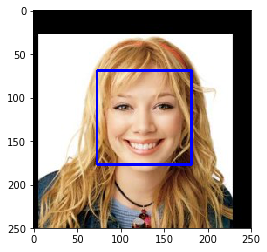

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[94])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    print(x,y,w,h)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    
    # load color (BGR) image
    img = cv2.imread(img_path)
    
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find faces in image
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 
Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

- What percentage of the first 100 images in `human_files` have a detected human face? 
        Answer: 98.0 %  human face found
    
    
- What percentage of the first 100 images in `dog_files` have a detected human face? 
        Answer: 17.0 %  human face found
  

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]


#-#-# Do NOT modify the code above this line. #-#-#
def HumanFaceFound(img_files):
    count = 0
    for img in img_files:
        human = face_detector(img)
        if human==True:
            count += 1
    print(count/len(human_files_short)*100, "% ", "human face found")
    
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
HumanFaceFound(human_files_short)
HumanFaceFound(dog_files_short)

98.0 %  human face found
17.0 %  human face found


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# Get pretrained model using torchvision.models as models library

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:41<00:00, 13410229.86it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    VGG16.eval()
    im=Image.open(img_path)
    
    transformations = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
    image = transformations(im).unsqueeze_(0)
    
    if use_cuda: image = image.cuda()
        
    output = VGG16.forward(image)
    
    probs, classes = output.topk(1, dim=1)
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return classes.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predict = VGG16_predict(img_path)
    return ((predict <= 268) & (predict >= 151)) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
        -percentage of dog images detected in human_files_short:  1
- What percentage of the images in `dog_files_short` have a detected dog?
        -percentage of dog images detected in dog_files_short:  91
    

__Answer:__ 


In [9]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_in_human_files_short = np.sum(dog_detector(image) for image in human_files_short)
dog_in_dog_files_short = np.sum(dog_detector(image) for image in dog_files_short)

print('percentage of dog images detected in human_files_short: ', dog_in_human_files_short )
print('percentage of dog images detected in dog_files_short: ', dog_in_dog_files_short)

percentage of dog images detected in human_files_short:  1
percentage of dog images detected in dog_files_short:  91


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

# Optional: Making prediction with densenet161 pretrained model

1. Load densenet161

In [10]:
import torch
import torchvision.models as models

# Get pretrained model using torchvision.models as models library

# define densenet model
densenet = models.densenet161(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    densenet = densenet.cuda()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:01<00:00, 96076676.74it/s]


2. Create densenet_predict function

In [11]:
from PIL import Image
import torchvision.transforms as transforms

def densenet_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    densenet.eval()
    im=Image.open(img_path)
    
    transformations = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
    image = transformations(im).unsqueeze_(0)
    
    if use_cuda: image = image.cuda()
        
    output = densenet.forward(image)
    
    probs, classes = output.topk(1, dim=1)
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return classes.item() # predicted class index

3. write dog_detector function

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predict = densenet_predict(img_path)
    return ((predict <= 268) & (predict >= 151)) # true/false

4. Test in human_files_short and dog_files_short

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_in_human_files_short = np.sum(dog_detector(image) for image in human_files_short)
dog_in_dog_files_short = np.sum(dog_detector(image) for image in dog_files_short)

print('percentage of dog images detected in human_files_short: ', dog_in_human_files_short )
print('percentage of dog images detected in dog_files_short: ', dog_in_dog_files_short)

percentage of dog images detected in human_files_short:  1
percentage of dog images detected in dog_files_short:  95


# Comparison:
Accuracy is slightly higher with models.densenet161 when compared to models.vgg16

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
# Step 1: Import libraries
import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 20
transform_train = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_valid_and_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_data_path = "/data/dog_images/train"
valid_data_path = "/data/dog_images/valid"
test_data_path = "/data/dog_images/test"

train_dataset = datasets.ImageFolder(train_data_path, transform = transform_train)            
valid_dataset = datasets.ImageFolder(valid_data_path, transform = transform_valid_and_test)
test_dataset =  datasets.ImageFolder(test_data_path, transform = transform_valid_and_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I am introducing resizing the images, also center cropping by 224x224, making it compariable to images sizes to the pytorch pre-trained models. 
I also introduced image augmentations to the training data by randomly flipping the image and randomly rotating the image by 10 degrees. By this, I can increase the performanance of my model and prevent overfitting. 
For validation and test data, I only introduced resizing the images before converting the images to tensor. 
Train, validation and test data are being normalized.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
import torch.nn as nn
import torch.nn.functional as F
use_cuda = torch.cuda.is_available()
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # conv1 sees 224x224x3 image tensor
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        # conv2 sees 112x112x32 image tensor after maxpool layer
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        #conv3 sees 56x56x64 image tensor after another maxpool layer
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        # fc1 see 28x28x128
        self.fc1 = nn.Linear(28*28*128, 512)
        self.fc2 = nn.Linear(512, 133)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        #flatten image input
        x = x.view(-1, 28*28*128)
        # add dropout layer
        x = self.dropout(x)
        # add 1st fully connected hidden layer, and apply relu activation fucntion
        x = self.bn1(F.relu(self.fc1(x)))
        #add dropout layer
        x = self.dropout(x)
        # add 2nd fully connected hidden layer, and apply relu activation fucntion
        x = self.fc2(x)        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [16]:
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Step taken: 

**1:** In __init__ method,  
Introduce 3 convolutional layers (conv1 ,conv2, conv3),1 max pooling layer (pool),  2 fully connected layers (fc1 & fc2 ), bach normalization and dropout function.

**2:** In **forward** function, Relu activiation is applied to each conv layer and then pooling is applied. Image input is flattened before passing it to fully connected layers using x = x.view(-1, 28*28*128). After flattening the image input, dropout is applied to prevent overfitting. Relu activation function is applied to fc1 and batch normalization is applied. 
Another dropout is applied before second fully connected layer fc2. Relu function is not applied to the last fully connected layer fc2. SoftMax Function is included in CrossEntropyLoss loss function

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

#empty the cache
torch.cuda.empty_cache()

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            #train_loss += loss.item()*data.size(0)
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## turn off gradients for validation loss   
            #with torch.no_grad():
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model.forward(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                epoch, 
                train_loss,
                valid_loss
                ))
        
        ## TODO: save the model if validation loss has decreased
     # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss       
    # return trained model
    return model

Train model_scratch

In [19]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch,criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.737563 	Validation Loss: 4.615322
Validation loss decreased (inf --> 4.615322).  Saving model ...
Epoch: 2 	Training Loss: 4.487207 	Validation Loss: 4.456887
Validation loss decreased (4.615322 --> 4.456887).  Saving model ...
Epoch: 3 	Training Loss: 4.319237 	Validation Loss: 4.301370
Validation loss decreased (4.456887 --> 4.301370).  Saving model ...
Epoch: 4 	Training Loss: 4.188822 	Validation Loss: 19.423351
Epoch: 5 	Training Loss: 4.053291 	Validation Loss: 4.199537
Validation loss decreased (4.301370 --> 4.199537).  Saving model ...
Epoch: 6 	Training Loss: 3.930357 	Validation Loss: 4.096467
Validation loss decreased (4.199537 --> 4.096467).  Saving model ...
Epoch: 7 	Training Loss: 3.804220 	Validation Loss: 4.055702
Validation loss decreased (4.096467 --> 4.055702).  Saving model ...
Epoch: 8 	Training Loss: 3.682549 	Validation Loss: 3.951943
Validation loss decreased (4.055702 --> 3.951943).  Saving model ...
Epoch: 9 	Training Loss: 3.551724

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [22]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.544666


Test Accuracy: 21% (176/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
#copying loaders_scratch data loaders defined above
loaders_transfer = loaders_scratch.copy()
loaders_transfer

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f2bd915c9e8>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f2bd915c908>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f2bd915c940>}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
import torchvision.models as models
import torch.nn as nn

# check if CUDA is available
use_cuda = torch.cuda.is_available()
## TODO: Specify model architecture 

# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)

In [25]:

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
# add last linear layer (n_inputs -> n_classes dog breed classes)
n_inputs = model_transfer.classifier[6].in_features
n_class = 133
final_layer = nn.Linear(n_inputs,n_class )

model_transfer.classifier[6] = final_layer

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

In **Step 4**, I chose vgg16 model as pretrained model and loaded it using **model_transfer = models.vgg16(pretrained=True)**. Then already pretrained feature parameters are being frozen, where gradients updates are set to **False**.
All we need to do is modify the out_features of the last fully connected layer to **133** which is the number of dog breed classes.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [26]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [28]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.655150 	Validation Loss: 2.170617
Validation loss decreased (inf --> 2.170617).  Saving model ...
Epoch: 2 	Training Loss: 1.667901 	Validation Loss: 0.999801
Validation loss decreased (2.170617 --> 0.999801).  Saving model ...
Epoch: 3 	Training Loss: 1.052215 	Validation Loss: 0.728152
Validation loss decreased (0.999801 --> 0.728152).  Saving model ...
Epoch: 4 	Training Loss: 0.822767 	Validation Loss: 0.630956
Validation loss decreased (0.728152 --> 0.630956).  Saving model ...
Epoch: 5 	Training Loss: 0.700651 	Validation Loss: 0.567675
Validation loss decreased (0.630956 --> 0.567675).  Saving model ...
Epoch: 6 	Training Loss: 0.653425 	Validation Loss: 0.552200
Validation loss decreased (0.567675 --> 0.552200).  Saving model ...
Epoch: 7 	Training Loss: 0.576446 	Validation Loss: 0.517009
Validation loss decreased (0.552200 --> 0.517009).  Saving model ...
Epoch: 8 	Training Loss: 0.531285 	Validation Loss: 0.497825
Validation loss decreased (0.51700

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.484359


Test Accuracy: 85% (718/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [31]:
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
#copying loaders_scratch data loaders defined above
data_transfer = loaders_scratch.copy()
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    model_transfer.eval()
    # load the image and return the predicted breed
    #open the image 
    im=Image.open(img_path)
    
    # define transformations
    transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #apply transformation to the image
    image = transform(im).unsqueeze_(0)
        
    #move image to cude if it is available
    if use_cuda: image = image.cuda()
    # calculate output from model_transfer
    output = model_transfer(image)
    predict = torch.argmax(output).item()
    
    breed_name = class_names[predict]
    return breed_name

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    #call dog breed predict function defined above
    dog_breed = predict_breed_transfer(img_path)
    
    # check options when detected image looks like a dog/human or nothing at all
    if predict_breed_transfer(img_path):
        print('dog detected, and it looks like ', dog_breed)
    elif face_detector(img_path):
        print('human face is detected, and this human face looks like ', dog_breed)
    else: 
        print('Does not look like a any type of dog at all)')
    #display the image
    # load color (BGR) image
    img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
    #return None

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Overall, the output is good and as expected with 85% accuracy. Model is doing good for human and dog images, where were used to train the model. However, surpizingly model is detecting human face from the images from my computer, but classifying corresponding dog breed correctly. I would say it might be a good idea to write modified custom human face detector function and test it.
Possible improvements:
       1. Improve the model to generalize detect both human and dogs in one image
       2. We can introduce more label and examples of dog breed and train for longer epochs to increase the accuracy
       3. Finally, i would say it would be interesting to test the model in hybrid dog images to test the model performance. If not, then we would need to train the model again to detect them

human face is detected, and this human face looks like  Bluetick coonhound


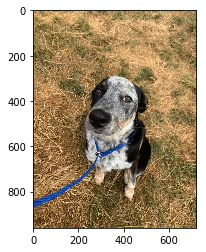

human face is detected, and this human face looks like  Chihuahua


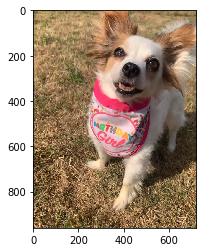

human face is detected, and this human face looks like  Poodle


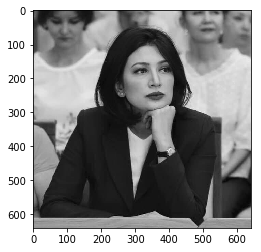

human face is detected, and this human face looks like  Nova scotia duck tolling retriever


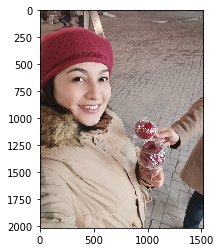

dog detected, and it looks like  French bulldog


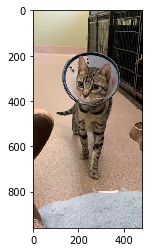

human face is detected, and this human face looks like  Dogue de bordeaux


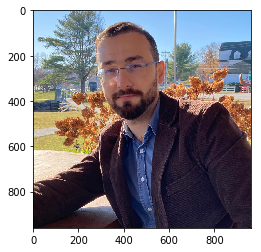

In [34]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

run_app('custom_images/dog1.jpg')
run_app('custom_images/dog2.jpg')
run_app('custom_images/human1.jpg')
run_app('custom_images/human2.jpg')
run_app('custom_images/cat.jpg')
run_app('custom_images/human3.jpg')

human face is detected, and this human face looks like  Brittany


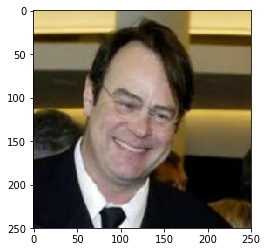

human face is detected, and this human face looks like  Dachshund


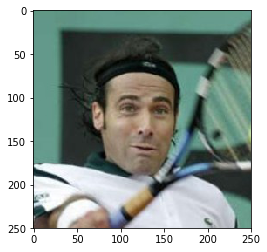

human face is detected, and this human face looks like  Afghan hound


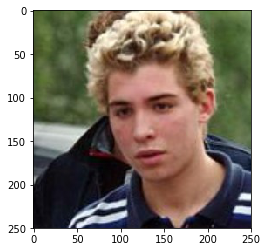

dog detected, and it looks like  Mastiff


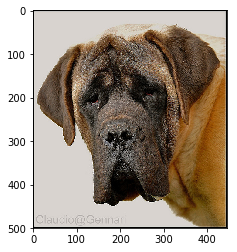

dog detected, and it looks like  Mastiff


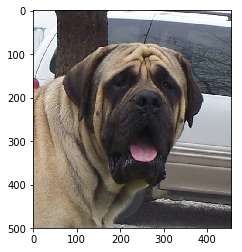

dog detected, and it looks like  Mastiff


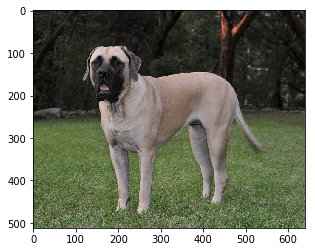

dog detected, and it looks like  Mastiff


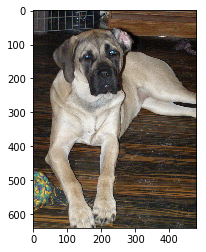

dog detected, and it looks like  Mastiff


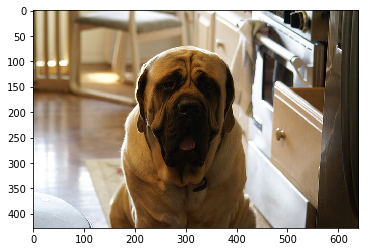

dog detected, and it looks like  Mastiff


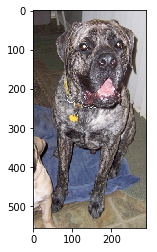

In [35]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[14:20])):
    run_app(file)